In [1]:
import os
os.chdir('..')
import sys
sys.path.insert(0, './python')

import caffe
import numpy as np
from pylab import *
%matplotlib inline

from caffe import layers as L
from caffe import params as P


# Helper function for deprocessing preprocessed images, e.g., for display.
def deprocess_net_image(image):
    image = image.copy()              # don't modify destructively
    image = image[::-1]               # BGR -> RGB
    image = image.transpose(1, 2, 0)  # CHW -> HWC
    image += [123, 117, 104]          # (approximately) undo mean subtraction

    # clamp values in [0, 255]
    image[image < 0], image[image > 255] = 0, 255

    # round and cast from float32 to uint8
    image = np.round(image)
    image = np.require(image, dtype=np.uint8)

    return image

(50, 3, 227, 227)


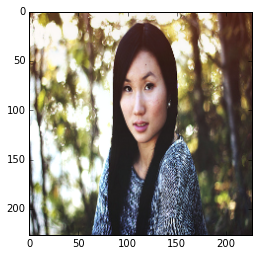

In [16]:

#Prototxt file path
proto_path = 'models/finetune_flickr_style_2/train_val.prototxt'
weights = 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'

niter = 200
# losses will also be stored in the log
train_loss = np.zeros(niter)
scratch_train_loss = np.zeros(niter)

caffe.set_device(0)
caffe.set_mode_gpu()


dummy_data = L.DummyData(shape=dict(dim=[1, 3, 227, 227]))
imagenet_net = caffe.Net(proto_path, weights, caffe.TEST)

imagenet_net.forward()

imgData = imagenet_net.blobs['data'].data.copy()

print(np.shape(imgData))

image = imgData[8,...]

plt.imshow(deprocess_net_image(image))

In [18]:
print imagenet_net.blobs['pred'].data[8]

[ 0.05372948  0.06795423  0.07893166  0.01694437  0.00813675  0.05292368
  0.1180833   0.02725893  0.06709811  0.02272362  0.02517251  0.15707657
  0.03272524  0.04377922  0.01507035  0.02116369  0.038915    0.06056255
  0.05132822  0.04042253]
